this ia an example in the Martin(2018) book on page 305

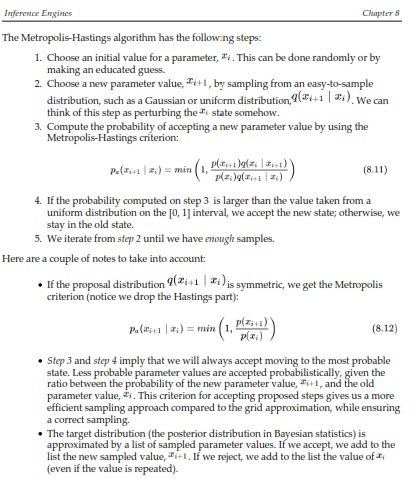

The first argument of the metropolis function is a SciPy distribution; we are assuming we do not know how to directly get samples from this distribution

In [ ]:
def metropolis(func, draws=10000):
    """A very simple Metropolis implementation"""
    trace = np.zeros(draws)
    old_x = 0.5  # func.mean()
    old_prob = func.pdf(old_x)
    delta = np.random.normal(0, 0.5, draws)
    for i in range(draws):
        new_x = old_x + delta[i]
        new_prob = func.pdf(new_x)
        acceptance = new_prob / old_prob
        if acceptance >= np.random.random():
            trace[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            trace[i] = old_x
    return trace

In the next example, we have defined func as a beta function, simply because it's easy to change their parameters and get different shapes. We are plotting the samples obtained by metropolis as a histogram and also the true distribution as the continuous (orange) line:

In [ ]:

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

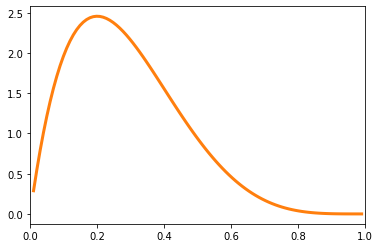

In [ ]:
np.random.seed(3)
func = stats.beta(2, 5)
trace = metropolis(func=func)
x = np.linspace(0.01, .99, 100)
y = func.pdf(x)
plt.xlim(0, 1)
plt.plot(x, y, 'C1-', lw=3, label='True distribution')

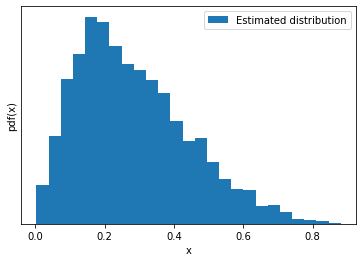

In [ ]:
plt.hist(trace[trace > 0], bins=25, density=True, label='Estimated distribution')
plt.xlabel('x')
plt.ylabel('pdf(x)')
plt.yticks([])
plt.legend();

The efficiency of the algorithm depends heavily on the proposal distribution; if the proposed state is very far away from the current state, the chance of rejecting is very high, and if the proposed state is very close, we explore the parameter space very slowly. In both scenarios, we will need many more samples than for a less extreme situation. Usually, the proposal is a multivariate Gaussian distribution whose covariance matrix is determined during the tuning phase. PyMC3 library tunes the covariance adaptively by following the rule of
thumb that the ideal acceptance is between 50% for a unidimensional Gaussian and around 23% for an n-dimensional Gaussian target distribution.

MCMC methods often take some time before they start getting samples from the target distribution. So, in practice, people perform a burn-in step, which consists of eliminating the first portion of the samples. Doing a burn-in is a practical trick and not part of Markovian theory; in fact, it will not be necessary for an infinite sample. Thus, removing the first portion of the samples is just an ad hoc trick to get better results, given that we can
only compute a finite sample